# Load Dataset
โหลดรูปภาพจากใน github ด้วยคำสั่ง git clone

In [1]:
!git clone https://github.com/Thawatchaitan/NN-Project.git

Cloning into 'NN-Project'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 292 (delta 14), reused 288 (delta 10), pack-reused 0
Receiving objects: 100% (292/292), 30.89 MiB | 12.68 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
from keras_preprocessing import image # ใช้แปลงรูปภาพ
import numpy as np # ใช้ในการดำเนินการเกี่ยวกับ array
import cv2 # ใช้อ่านภาพ
import os # ใช้เรียก path
import matplotlib.pyplot as plt # ใช้วาดกราฟ

In [3]:
images = [] # เก็บรูปภาพ
labels = [] # เก็บ Label รูปภาพ
folders = ['/content/NN-Project/Datasets/Eel','/content/NN-Project/Datasets/Mastacembelus'] # เก็บ path
def load_dataset(folder): # load_dataset เป็นฟังก์ชันไว้เก็บรูปภาพลง list
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder, filename)) # อ่าน path จากใน folder ด้วยการ join path
            img = cv2.resize(img, (500,500)) # resize รูปภาพโดยใช้ขนาด 300 x 300
            img = image.img_to_array(img) # แปลงรูปภาพเป็น array
            label = folder.split(os.path.sep)[-1]  # เก็บชื่อของ Label
            images.append(img) # เพิ่ม รูปภาพที่อยู่ในรูป array ลงใน list ที่มีชื่อว่า images
            labels.append(label) # เพิ่ม label ลงใน list ที่มีชื่อว่า labels
        except:
            continue

for folder in folders:
    load_dataset(folder)
x = np.array(images)/255 # แปลงชนิดข้อมูลเป็น type float32 และหารด้วย 255 ให้ค่าสีอยู่ในช่วง 0–1
y = np.array(labels) # เก็บ Label รูปภาพ
print(x.shape) # .shape คือการดูขนาดของ array
print(y)

(219, 500, 500, 3)
['Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel' 'Eel'
 'Mastacembelus' 'Mastacembelus' 'Mastacembelus' 'Mastacembelus'
 'Mastacembelus' 'Mastacembelus' 'Mastacembelus' 'Mastacembelus'
 'Mastacembelus' 'Mastacembelus' 'Mastacembelus' 'Mastacembelus'
 'Mastacembelus' 'Mastacembelus' 'Mastacembelus' 'Mastacembelus'
 'Mastacembelus' 'Mastacembelus' 'Mastacembelus' 'Mastacembelus'
 'Mastacemb

# Label / Onehot Encoder
เพื่อแปลงข้อมูลหมวดหมู่หรือข้อมูลตัวอักษรเป็นตัวเลขซึ่งตัวแบบการทำนายของเราสามารถเข้าใจได้ดีขึ้น

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

#integer encoder
integer_encoded = LabelEncoder().fit_transform(y) # ทำการแปลงข้อมูลเป็นข้อมูลตัวเลข จากตัวแปร y และเก็บลงใน integer_encoded
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # ใช้ reshape เป็น method ที่จะทำการคืน array ใหม่ที่มีขนาดมิติเท่ากับที่กำหนด
print(integer_encoded.shape)

#One hot encoding (binary encoded)
onehot_encoder = OneHotEncoder(sparse=False).fit_transform(integer_encoded) # แยกคอลัมน์ออกเป็นหลายคอลัมน์ ตัวเลขจะถูกแทนที่ด้วย 1s และ 0s
y = np.array(onehot_encoder)
print(y)

(219, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

# Train / Test split

In [5]:
from sklearn.model_selection import train_test_split # ใช้ในการแบ่งข้อมูล x_train, x_test, y_train, y_test

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.1, random_state=4) # ตัดข้อมูล โดยแบ่ง x_train,y_train  90%  x_test, y_test 10%

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(197, 500, 500, 3)
(22, 500, 500, 3)
(197, 2)
(22, 2)


# วิธีการ TRAIN

In [6]:

#Convolution NN
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation ,BatchNormalization
from keras.models import Sequential

n_classes = len(folders) # จำนวน classses

model = Sequential() #เพื่อจะ add layer กำหนด model เท่ากับ sequential
model.add(Conv2D(16, (3, 3), input_shape=(500,500,3), activation='relu')) # เอารูปภาพขนาด 500x500 นำไป conv ใช่ filters 16 ชั้น ขนาด kernal size ขนาด 3x3 input รูปภาพ 500x500 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear 
model.add(BatchNormalization()) # นำเอา feature vector มาวิเคราะห์ เราควรทำการ normalize มันก่อน วิธีง่ายสุดก็คือการลบค่าเฉลี่ยให้มันมีการกระจายรอบ 0 และทำการ normalize ให้มีการกระจายตัวมาตรฐาน
model.add(MaxPooling2D(pool_size = (3, 3))) # ลดขนาดของ input มิติ รูปภาพเหลือครึ่งหนึ่ง
model.add(Activation('relu'))


model.add(Conv2D(32, (3, 3) ,activation='relu')) # นำไป conv ใช่ filters 32 ชั้น ขนาด kernal size ขนาด 3x3 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear
model.add(BatchNormalization()) # นำเอา feature vector มาวิเคราะห์ เราควรทำการ normalize มันก่อน วิธีง่ายสุดก็คือการลบค่าเฉลี่ยให้มันมีการกระจายรอบ 0 และทำการ normalize ให้มีการกระจายตัวมาตรฐาน
model.add(MaxPooling2D(pool_size = (3, 3))) # ลดขนาดของ input มิติ รูปภาพเหลือครึ่งหนึ่ง


model.add(Conv2D(70, (3, 3) ,activation='relu')) # นำไป conv ใช่ filters 70 ชั้น ขนาด kernal size ขนาด 3x3 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear
model.add(MaxPooling2D(pool_size = (3, 3))) # ลดขนาดของ input มิติ รูปภาพเหลือครึ่งหนึ่ง

model.add(Conv2D(70, (3, 3) ,activation='relu')) # นำไป conv ใช่ filters 70 ชั้น ขนาด kernal size ขนาด 3x3 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear
model.add(Conv2D(120, (3, 3) ,activation='relu')) # นำไป conv ใช่ filters 120 ชั้น ขนาด kernal size ขนาด 3x3 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear
model.add(Conv2D(64, (3, 3) ,activation='relu')) # นำไป conv ใช่ filters 64 ชั้น ขนาด kernal size ขนาด 3x3 ใช้ Activation Function '' การตรวจสอบรูปภาพก่อนหน้า โดยข้อมูลจะถูกแปลงมาอยู่ในรูปของ non-linear
model.add(MaxPooling2D(pool_size = (3, 3))) # ลดขนาดของ input มิติ รูปภาพเหลือครึ่งหนึ่ง



model.add(Flatten()) # เปลี่ยนจาก 2 มิติ เป็น 1 มิติ
model.add(Dense(150, activation='relu')) # hidden layer 1 แท่ง มี 150 neural
model.add(Dense(80, activation='relu')) # hidden layer 1 แท่ง มี 80 neural
model.add(Dense(40, activation='relu')) # hidden layer 1 แท่ง มี 40 neural
model.add(Dense(n_classes, activation='softmax')) # output layer โดยใช้ softmax

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') # หาค่า loss โดยใช้ categorical_crossentropy ใช้ accuracy หาค่าความถูกต้อง 
print(model.summary()) # ผลลัพธ์

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 498, 498, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 166, 166, 16)      0         
_________________________________________________________________
activation (Activation)      (None, 166, 166, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 164, 164, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 164, 164, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0

In [7]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=75, verbose=1) # เริ่ม train ค่าที่ใช้ประกอบด้วย x_train  y_train  batch_size ขนาด 32 epochs ระบุจำนวนรอบ verbose

Epoch 1/75
7/7 [==============================] - 1s 162ms/step - loss: 0.8362 - accuracy: 0.5381
Epoch 2/75
7/7 [==============================] - 1s 139ms/step - loss: 0.6684 - accuracy: 0.5736
Epoch 3/75
7/7 [==============================] - 1s 141ms/step - loss: 0.6211 - accuracy: 0.6345
Epoch 4/75
7/7 [==============================] - 1s 145ms/step - loss: 0.5755 - accuracy: 0.6904
Epoch 5/75
7/7 [==============================] - 1s 142ms/step - loss: 0.5766 - accuracy: 0.7208
Epoch 6/75
7/7 [==============================] - 1s 139ms/step - loss: 0.5240 - accuracy: 0.7716
Epoch 7/75
7/7 [==============================] - 1s 141ms/step - loss: 0.4949 - accuracy: 0.7970
Epoch 8/75
7/7 [==============================] - 1s 143ms/step - loss: 0.4843 - accuracy: 0.7563
Epoch 9/75
7/7 [==============================] - 1s 140ms/step - loss: 0.5973 - accuracy: 0.6091
Epoch 10/75
7/7 [==============================] - 1s 140ms/step - loss: 0.5941 - accuracy: 0.7563
Epoch 11/75
7/7 [==

วาดกราฟเพื่อบอก ค่า loss function โดยจะมีตัวแปร hist ที่เก็บค่าจากการ train ข้อมูลมา และ พลอตเป็นกราฟออกมา

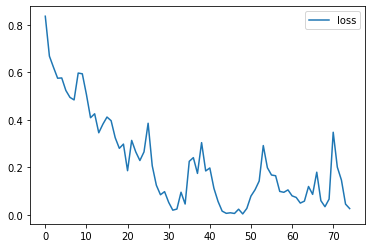

In [8]:
# Plot loss per iteration
plt.plot(hist.history['loss'], label='loss')
plt.legend()

วาดกราฟเพื่อบอก ค่า Accuracy โดยจะมีตัวแปร hist ที่เก็บค่าจากการ train ข้อมูลมา และ พลอตเป็นกราฟออกมา

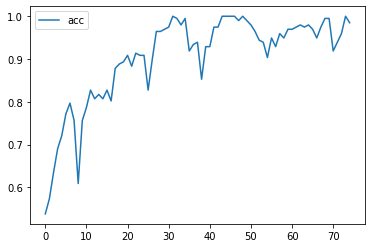

In [9]:
# Plot accuracy per iteration
plt.plot(hist.history['accuracy'], label='acc')
plt.legend()

# วิธีการ TEST

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) # ใช้ method evaluate คำนวณหา loss function กับ Accuracy โดยใช้ x_test y_test ในการหาเพื่อวัดประสิธิภาพ model
print(model.metrics_names)
print("Accuracy",score[1]*100,"%")
print("Loss",score[0])

['loss', 'accuracy']
Accuracy 50.0 %
Loss 1.8133960962295532


# วิธีการเรียกใช้งาน

ทั้งนี้ทั้งนั้น ความถูกต้องของตัวโมเดล ขึ้นอยู่กับชุด Dataset ที่มี

In [12]:
model.save('model.h5') # นำโมเดลออกมาใช้งาน โดยใช้ method save

In [ ]:
 from keras.models import load_model
#import user folder
name = ['Eel','Mastacembelus'] # เก็บชื่อ
images = []
load_dataset('/content/Untitled Folder') # โหลดข้อมูล จาก Folder
x = np.array(images)/255 #  แปลงชนิดข้อมูลเป็น type float32 และหารด้วย 255 ให้ค่าสีอยู่ในช่วง 0–1

#load model
h5model = load_model('/content/model.h5') # โหลดโมเดล
y_model = h5model.predict(x) # ใช้ method predict มาทำนายรูปภาพที่รับเข้ามา แล้วเก็บลงใน y_model


#  print(folders)
#  print(name)
 plt.figure(figsize=(30,30)) # กำหนดขนาดภาพ
for i in range(len(images)): # วน for เพื่อแสดงผลลัพธ์
  plt.subplot(1, len(images), i+1)
  plt.imshow(cv2.cvtColor(x[i],cv2.COLOR_BGR2RGB)) # แสดงรุปภาพ ตาม x ที่ i
  accuracy = y_model[i][np.argmax(y_model[i])]*100 # เก็บค่าของความถูกต้องของรูปภาพตัวที่ i โดยใช้ np.argmax ดึงค่ามากสุดจากใน y_model ที่ได้ predict ไว้ก่อนหน้า
  # plt.title("Predicted: %s \nAccuracy = %.2f" % (name[np.argmax(y_model[i])], accuracy));
  if accuracy >60: # ทำมาเพื่อกำหนดว่า ถ้ารูปภาพมีค่า accuracy หรือค่าความถูกต้องมากกว่า 70 จะให้ แสดงผล ออกมา แต่ ถ้าหากน้อยกว่าจะให้แสดงผลว่า This not predict  เพื่อแสดงถึงว่าภาพค่าความถูกต้องต่ำไป
    plt.title("Predicted: %s \nAccuracy = %.2f" % (name[np.argmax(y_model[i])], accuracy)); # กำหนด title ว่าจะให้แสดงผลอะไรบ้าง
  else:
    plt.title("This not predict");
  plt.axis('off')

plt.show() # show ผลลัพธ์